In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.power import TTestPower
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2, norm, chi2_contingency
from statsmodels.stats.power import TTestIndPower

### Problem 5

In [3]:
suger_conc = np.array([11.48,11.50, 11.45,11.42, 11.48,11.49, 11.47,11.45, 11.48,11.44,11.45,11.50, 11.47,11.49, 11.46,11.45, 11.47,11.46, 11.43,11.47])

#### (A) Test the hypothesis H0 = 11.5 vs. H1 does not = 11.5 using alpha = 0.05. Find the P-value

In [4]:
#Paramter of Interet: Mean
#Null Hypothesis: Stated in the problem 
#Alternate Hypothesis: Stated in the problem
#Test Statistic: Tnaught as variance is unknown 
n = len(suger_conc)
print('n is', n)
sample_mean= suger_conc.mean()
print('Sample Mean is', sample_mean)
sample_std = suger_conc.std()
print('Sample STD is,', sample_std)
test = (sample_mean - 11.5) / (sample_std/(n**(1/2)))
test #This is functionally a Z value - it will tell you your probability 


n is 20
Sample Mean is 11.465500000000002
Sample STD is, 0.021558061137310333


-7.156890847686181

In [5]:
df = 19  # Example degrees of freedom

# Compute the cumulative probability for the given t-value (one-tailed)
p_value = stats.t.cdf(test, df)

p_value_two_tailed = 2 * p_value

print(f"p-value for t-value {test} with {df} degrees of freedom: {p_value_two_tailed}")


p-value for t-value -7.156890847686181 with 19 degrees of freedom: 8.40795940660253e-07


#### Our P-value is very, very small, assuredly smaller than the alpha value. That means that we can reject the null, the true mean is not 11.5. 

#### (B) Compute the power of the test if the true mean is 11.4

In [6]:
true_mean = 11.4
null_mean = 11.5
std = sample_std
n = n
df = n - 1
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df)  
t_critical
margin_of_error = t_critical * (std / np.sqrt(n))

# Compute critical region boundaries
lower_critical = null_mean - margin_of_error
upper_critical = null_mean + margin_of_error

# Calculate t-scores for true mean relative to critical boundaries
t_lower = (lower_critical - true_mean) / (std / np.sqrt(n))
t_upper = (upper_critical - true_mean) / (std / np.sqrt(n))

# Power is the probability of rejecting the null under the true mean
power = stats.t.cdf(t_lower, df) + (1 - stats.t.cdf(t_upper, df))


print(f"Power of the t-test: {power:.4f}")


Power of the t-test: 1.0000


In [7]:
effect_size = (true_mean - null_mean) / std

# Create a TTestPower instance
power_analysis = TTestPower()

# Calculate power
power = power_analysis.power(effect_size=effect_size, nobs=n, alpha=alpha, alternative='two-sided')

print(f"Power of the test: {power:.4f}")

Power of the test: 1.0000


#### (C) What Sample Size would be required to detect a true mean sugar concentraion of 11.45 if we wanted the power of the test to be at least 0.9? 

In [8]:
true_mean = 11.45
effect_size = (true_mean - null_mean) / std
sample_size = power_analysis.solve_power(effect_size=effect_size, power=0.9, alpha=0.05)
print('sample size is:', sample_size)

sample size is: 4.270165417242369


#### (D) Explain how the question in part (a) could be answered by constructing a two-sided confidence interval on the mean sugar concentration

#### A two sided confidence interval calculates the range of possible values for a given parameter. Using an alpha of 0.05, we could calculate a 95% confidence interval and then see if the null value for the mean falls within that range. If it doesn't, we can reject it. If it does, we can accept it

#### (E) Is ther evidence to support the assumption that the sugar concentraiton is normall distributed?

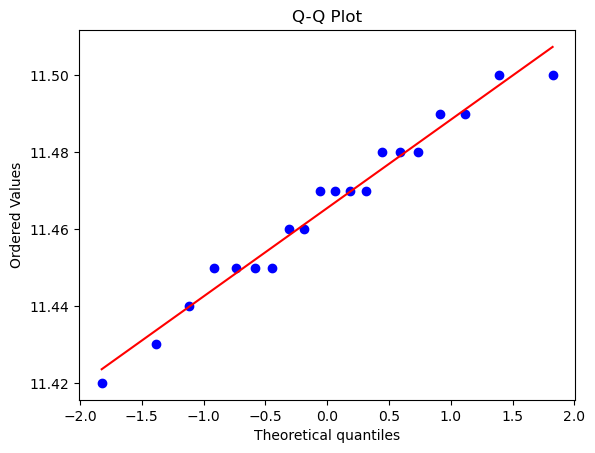

In [9]:
stats.probplot(suger_conc, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

#### Yes, this appears to be normally distributed

### Problem 6: A particular brand of diet margarine was analyzed to determine the level of polyunsaturated fatty acid (in percent- ages). A sample of six packages resulted in the following data: 16.8, 17.2, 17.4, 16.9, 16.5, 17.1.

#### (a) For the sample size n = 6, using a two-sided alternative hypothesis and alpha = 0.01, test H0: variance = 1.0 

In [10]:
margarine =np.array([16.8, 17.2, 17.4, 16.9, 16.5, 17.1])
n = 6
alpha = 0.01
std = margarine.std()
null = 1.0

In [11]:
#Parameter of interest : variance 
#Null hypothesis: H0 = 1.0
#Alternate Hypothesis: Two-sided, so H1 does not equal 1.0 
#Test statistics: X0^2 = ((n-1)s^2)/(Sigma)^2
test_stat = ((n-1)*std**2) / null
print('test_statistic is:', test_stat)



test_statistic is: 0.4236111111111102


In [12]:
lower_critical_value = chi2.ppf(alpha /2, 5)
print('Lower Critical Value is:', lower_critical_value)
upper_critical_value = chi2.ppf(1-alpha /2, 5)
print('Upper Critical Value is:', upper_critical_value)


Lower Critical Value is: 0.41174190383249887
Upper Critical Value is: 16.74960234363904


#### The test statistic, 0.423, is not less than the lower critical value. In other words, it is within the acceptance region for the given critical values. Ergo, we fail to reject the null


#### (B) Suppose that instead of n = 6, the sample size was n = 51. Repeat the analysis performed in part (a) using n =  51.

In [13]:
n = 51 
test_stat = ((n-1)*std**2) / null
print('test_statistic is:', test_stat)
lower_critical_value = chi2.ppf(alpha /2, 50)
print('Lower Critical Value is:', lower_critical_value)
upper_critical_value = chi2.ppf(1-alpha /2, 50)
print('Upper Critical Value is:', upper_critical_value)


test_statistic is: 4.236111111111103
Lower Critical Value is: 27.990748866373313
Upper Critical Value is: 79.48997846682893


#### (C) Compare your answers and comment on how sample size affects your conclusions drawn in parts (a) and (b).

##### With a larger sample size, the test statistic falls outside the critical values. Therefore, the conclusion from part A is not longer true - we reject the null, the variance does not equal one. 

### Problem 7: Consider the situation of Exercise 9-124. After collecting a sample, we are interested in testing H 0 : p = 0.10 versus H1: P does not equal0.10 with alpha = 0.05. For each of the following situations, compute the p-value for this test:

In [14]:
#A
H0 = 0.1
alpha = 0.05
n = 50
p = 0.095
X = p*n #This is from 9-124. We want the number of defective items for the test statistic, not the proportion
test_stat = (X-n*H0) / ((n*H0*(1-H0))**(1/2))
print('Test statistic is:', test_stat)
phi_z0 = norm.cdf(test_stat)
print('z_score is', phi_z0)
p_value = 2*phi_z0
print('The P-Value is:', p_value)

Test statistic is: -0.11785113019775793
z_score is 0.45309280787746414
The P-Value is: 0.9061856157549283


In [15]:
#(B)
H0 = 0.1
alpha = 0.05
n = 100
p = 0.095
X = p*n #This is from 9-124. We want the number of defective items for the test statistic, not the proportion
test_stat = (X-n*H0) / ((n*H0*(1-H0))**(1/2))
print('Test statistic is:', test_stat)
phi_z0 = norm.cdf(test_stat)
print('z_score is', phi_z0)
p_value = 2*phi_z0
print('The P-Value is:', p_value)

Test statistic is: -0.16666666666666666
z_score is 0.43381616738909634
The P-Value is: 0.8676323347781927


In [16]:
#(C)
H0 = 0.1
alpha = 0.05
n = 500
p = 0.095
X = p*n #This is from 9-124. We want the number of defective items for the test statistic, not the proportion
test_stat = (X-n*H0) / ((n*H0*(1-H0))**(1/2))
print('Test statistic is:', test_stat)
phi_z0 = norm.cdf(test_stat)
print('z_score is', phi_z0)
p_value = 2*phi_z0
print('The P-Value is:', p_value)

Test statistic is: -0.37267799624996495
z_score is 0.35469405750711314
The P-Value is: 0.7093881150142263


In [17]:
#(D)
H0 = 0.1
alpha = 0.05
n = 1000
p = 0.095
X = p*n #This is from 9-124. We want the number of defective items for the test statistic, not the proportion
test_stat = (X-n*H0) / ((n*H0*(1-H0))**(1/2))
print('Test statistic is:', test_stat)
phi_z0 = norm.cdf(test_stat)
print('z_score is', phi_z0)
p_value = 2*phi_z0
print('The P-Value is:', p_value)

Test statistic is: -0.5270462766947299
z_score is 0.2990807263417641
The P-Value is: 0.5981614526835282


#### Observed P_value decreases as you increase sample size. The P-value is still large, so there is not strong evidence against the null, i.e. we fail to reject the null. 



### Problem 8

#### Generating Expected Frequency Table

In [18]:
i = ['A', 'B', 'C', 'Other']
data = {'A': pd.Series([25, 17, 18, 10], index = [i]), 'B': pd.Series([6, 16, 4, 8], index = [i]), 'C': pd.Series([17, 15, 18, 11], index = [i]), 'Other': pd.Series([13, 6, 10, 20], index = [i])}
grades_df = pd.DataFrame(data)

In [19]:
grades_df

,A,B,C,Other
A,25,6,17,13
B,17,16,15,6
C,18,4,18,10
Other,10,8,11,20


In [20]:
#Finding Expected frequences
r_sums = grades_df.sum(axis=1)
print('Row Sums', r_sums)

Row Sums A        61
B        54
C        50
Other    49
dtype: int64


In [21]:
grades_df['Totals'] = r_sums.values
grades_df

,A,B,C,Other,Totals
A,25,6,17,13,61
B,17,16,15,6,54
C,18,4,18,10,50
Other,10,8,11,20,49


In [22]:
c_sums = grades_df.sum(axis = 0)
c_sums
grades_df

,A,B,C,Other,Totals
A,25,6,17,13,61
B,17,16,15,6,54
C,18,4,18,10,50
Other,10,8,11,20,49


In [23]:
grades_df.loc['Totals'] = c_sums

In [24]:
grades_df.index = ['A', 'B', 'C', 'Other', 'Totals'] #index got wonky, resetting it 

In [25]:
grades_df

,A,B,C,Other,Totals
A,25,6,17,13,61
B,17,16,15,6,54
C,18,4,18,10,50
Other,10,8,11,20,49
Totals,70,34,61,49,214


In [26]:
u1 = (grades_df['Totals'].iloc[0]) / 214
u2 = (grades_df['Totals'].iloc[1]) / 214
u3 = (grades_df['Totals'].iloc[2]) / 214
u4 = (grades_df['Totals'].iloc[3]) / 214
print(u1 + u2 + u3 +u4)


1.0


In [27]:
v1 = (grades_df['A'].iloc[4]) / 214
v2 = (grades_df['B'].iloc[4]) / 214
v3 = (grades_df['C'].iloc[4]) / 214
v4 = (grades_df['Other'].iloc[4]) / 214
print (v1+ v2 +v3+v4)

0.9999999999999999


In [28]:
E11 = 214*u1*v1
E12 = 214*u1*v2
E13 = 214*u1*v3
E14 = 214*u1*v4
row_a = np.array([E11, E12, E13, E14])

print(row_a)
E21 = 214*u2*v1
E22 = 214*u2*v2
E23 = 214*u2*v3
E24 = 214*u2*v4
row_b = np.array([E21, E22, E23, E24])

E31 = 214*u3*v1
E32 = 214*u3*v2
E33 = 214*u3*v3
E34 = 214*u3*v4
row_c = np.array([E31, E32, E33, E34])

E41 = 214*u4*v1
E42 = 214*u4*v2
E43 = 214*u4*v3
E44 = 214*u4*v4
row_Other = np.array([E41, E42, E43, E44])


[19.95327103  9.69158879 17.38785047 13.96728972]


In [29]:
expected_frequencies = pd.DataFrame([row_a, row_b, row_c, row_Other], columns=['A','B','C','Other'])
expected_frequencies.index = ['A', 'B', 'C', 'Other']
expected_frequencies.sum(axis=0) #It worked!!!!


A        70.0
B        34.0
C        61.0
Other    49.0
dtype: float64

In [30]:
expected_frequencies

,A,B,C,Other
A,19.953271,9.691589,17.387850,13.967290
B,17.663551,8.579439,15.392523,12.364486
C,16.355140,7.943925,14.252336,11.448598
Other,16.028037,7.785047,13.967290,11.219626


In [31]:
#Parameter of Interest: Correlation between stats and operations research
#Null hypothesis: Grades in statistics and operations research are independent 
#Alternative Hypothesis: Grades in statistics are related to grades in operations research 
#Test Stastic is Defined in the Text and so I will not define it here. 
alpha = 0.01
r = 4
c = 4
df = (r-1)*(c-1)
#Critical Value = 21.66 with alpha = 0.01 and 9 degrees of freedom

#### Turns out, there's a package that will just do all this for you. Oh Well. At least I know I did it right

In [32]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(grades_df)

# Output the results
print("Test Statistic:", chi2)
print("p-value:", p)
print("Expected Frequencies:\n", expected)


Test Statistic: 25.554529759357457
p-value: 0.06062748378213728
Expected Frequencies:
 [[ 19.95327103   9.69158879  17.38785047  13.96728972  61.        ]
 [ 17.6635514    8.57943925  15.39252336  12.36448598  54.        ]
 [ 16.35514019   7.94392523  14.25233645  11.44859813  50.        ]
 [ 16.02803738   7.78504673  13.96728972  11.21962617  49.        ]
 [ 70.          34.          61.          49.         214.        ]]


#### Test stat 25.55 > critical 21.66. Therefore, we reject the null, the grades are not independent, the grades are related

### Problem 9

In [33]:
vendor1 = np.array([96.8, 100.0, 99.6, 99.4, 99.7, 101.1, 99.4, 99.8, 98.6, 100.3, 98.5, 99.9, 101.1, 97.7, 98.6, 99.1, 99.6, 98.3, 103.7, 101.9, 101.2, 98.2,
97.7, 101.0, 98.2])

vendor2 = np.array([106.8, 106.8, 104.7, 104.7, 103.2, 103.7, 106.8, 105.1, 102.6, 100.3, 104.0, 107.0, 104.0, 106.3, 102.2, 102.8, 104.6, 103.5, 106.3, 109.2, 106.4, 106.8, 104.1, 107.1, 108.0, 104.0, 104.3, 104.2, 107.2, 107.7, 102.2, 106.2, 105.8, 103.4, 105.4])


#### (A) Normality is needed to test the claim that variance from vendor1 is different from vendor 2. QQ plots show these two datasets are approximately normal

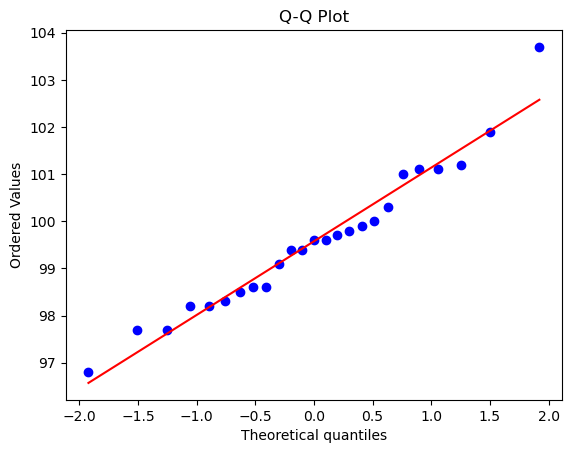

In [34]:
stats.probplot(vendor1, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

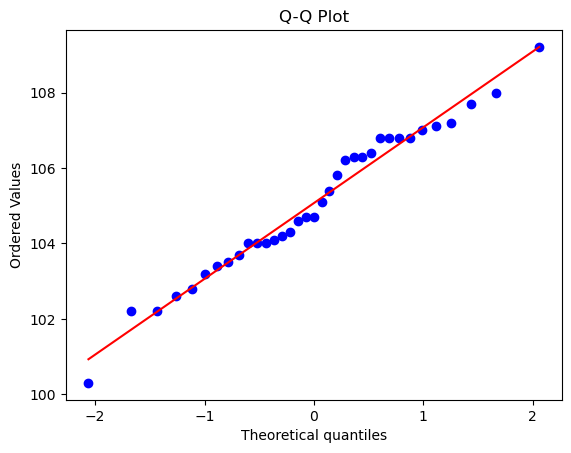

In [35]:
stats.probplot(vendor2, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

#### (B) Perform an appropriate statistical hypothesis-testing procedure to determine whether the procurement specialist can claim that the variance of resistance of product from vendor 1 is significantly different from the variance of resistance of product from vendor 2.

In [36]:
#parameter of interest: variance of resistance of product from vendor 1 vs. vendor2
#Null Hypothesis: resitance variance of 1 = resistor variance of 2
#Alternate hypothesis: resistor variance of 1 does not equal resistor variance of 2
#Test Statistic: f0 = variance 1/variance 2
#No alpha value given, we'll assume an alpha of 0.05 
var1 = np.var(vendor1, ddof = 1)
var2 = np.var(vendor2, ddof = 1)

In [37]:
f_stat = var1 / var2
f_stat

0.6069464565188306

In [38]:
df1 = len(vendor1) - 1
df2 = len(vendor2) - 1

In [39]:
p_value = 1 - stats.f.cdf(f_stat, df1, df2)
print('p_value is', p_value)

p_value is 0.8973132385226638


In [40]:
f_critical_upper = stats.f.ppf( 0.025, df1, df2)
print('critical value upper for F is',f_critical_upper)
f_critical_lower = stats.f.ppf( 0.025, df1, df2)
f_critical_lower = 1 / f_critical_lower
print('critical value lower for F is',f_critical_lower)

critical value upper for F is 0.4587788693376701
critical value lower for F is 2.17969934283085


#### Because our test stat, .609, is between the critical values, and has such a high p-value, we cannot reject the null. Ergo, the variance of 1 is not significantly different from the variance of 2

### Problem 10 (Hypothesis test on mean difference – paired test)

In [41]:
weights = pd.DataFrame({'Initial Weight': [165, 201, 195, 198, 155, 143, 150, 187], 'Final Weight': [161, 195, 192, 193, 150, 141, 146, 183]})
weights

,Initial Weight,Final Weight
0,165,161
1,201,195
2,195,192
3,198,193
4,155,150
5,143,141
6,150,146
7,187,183


#### (A) Do the data support the claim of the producer (average weight loss is 3 pounds) of the dietary product with the probability of a type I error set to 0.05?

In [42]:
#parameter of interest: difference in weight between initial and after using dietary liquid
#Null: uD = 3
#Alternative hypothesis: uD does not equal 3 
#test statistic is T0 = (D-Delta0)/SD / sqrt(n)
#reject H0if the p-value is <0.05
differences = weights['Initial Weight'].values - weights['Final Weight'].values
t_statistic, p_value = stats.ttest_1samp(differences, 3)
print('t_statistic is:', t_statistic)
print('p_value is:', p_value)
if p_value < 0.05:
    print('Reject the null, the data does not support the claim of the producer' )

t_statistic is: 2.5528888301902897
p_value is: 0.03794328796316367
Reject the null, the data does not support the claim of the producer


#### Yes, the data supports the claim. Very low p_value shows strong support for rejecting the null that there is no difference between the initial weight and the final weight 

#### (B)  Do the data support the claim of the producer of the dietary product with the probability of a type I error set to 0.01?

In [43]:
if p_value < 0.01:
    print('reject the null, the data does support the claim of the product')
else: 
    print('Accept the null. The data supports the claim of the producer at an error of 0.01')

Accept the null. The data supports the claim of the producer at an error of 0.01


#### (C) In an effort to improve sales, the producer is considering changing its claim from “at least 3 pounds” to “at least 5 pounds.” Repeat parts (a) and (b) to test this new claim.

In [44]:
#parameter of interest: difference in weight between initial and after using dietary liquid
#Null: uD = 5
#Alternative hypothesis: uD does not equal 5
#test statistic is T0 = (D-Delta0)/SD / sqrt(n)
#reject H0if the p-value is <0.05
differences = weights['Initial Weight'].values - weights['Final Weight'].values
t_statistic, p_value = stats.ttest_1samp(differences, 5)
print('t_statistic is:', t_statistic)
print('p_value is:', p_value)
if p_value < 0.05:
    print('Reject the null, the data does not support the claim of the producer' )
else:
    print('Accept the null, the average weight loss is at least 5 pounds')
if p_value < 0.01:
    print('Reject the null, the data does not support the claim of the producer' )
else:
    print('Accept the null, the average weight loss is at least 5 pounds')

t_statistic is: -1.9855802012591142
p_value is: 0.08745934260808004
Accept the null, the average weight loss is at least 5 pounds
Accept the null, the average weight loss is at least 5 pounds


### (11) Polio vaccine given to a placebo and normal group. Study was conducted double blind. 


In [45]:
n_placebo = 201, 299
n_vaccine = 200,745
placebo_observed = 110
vaccine_observed = 33

#### (a) Use a hypothesis-testing procedure to determine if the proportion of children in the two groups who contracted paralytic polio is statistically different. Use a probability of a type I error equal to 0.05.

In [46]:
#parameter of interest: effectiveness of polio vaccine 
#Null: p1 - p2 = 0 
#Alternative hypothesis: p1 - p2 does not equal 0 
#test statistic: Z for difference in proportions. It's a long equation, I'm not writing it. pg. 393 of the text 
#reject H0 if the p-value is <0.05
successes = np.array([110, 33])
total_patients =np.array([200,200])
z_stat, p_value = proportions_ztest(count=successes, nobs=total_patients)
print('z_stat is', z_stat)
print('p_value is', p_value)
if p_value < 0.05:
    print('null is rejected - there is a statistical different between the populations due to the vaccine')
else:
    print('Failt to reject the null. There is no signiicant difference')

z_stat is 8.033154882861671
p_value is 9.499761854365513e-16
null is rejected - there is a statistical different between the populations due to the vaccine



#### (b) Repeat part (a) using a probability of a type I error equal to 0.01.

In [47]:
if p_value < 0.01:
    print('null is rejected - there is a statistical different between the populations due to the vaccine')
else:
    print('Failt to reject the null. There is no signiicant difference')

null is rejected - there is a statistical different between the populations due to the vaccine


#### (c) Compare your conclusions from parts (a) and (b) and explain why they are the same or different.

#### They are the same. This is because the p_value is very, very low, meaning there is a strong statistical difference between the placebo and the vaccine groups. This makes sense, because the vaccine is effective

### (12) 

In [49]:
Surface = np.array([3.74, 4.61, 4.00, 4.67, 4.87, 5.12, 4.52, 5.29, 5.74, 5.48])
Bottom = np.array([5.44, 6.88, 5.37, 5.44, 5.03, 6.48, 3.89, 5.85, 6.85, 7.16])

### (a) What assumptions are required to test the claim that mean HCB concentration is the same at both depths? 

In [50]:
#Normality has to be assumed. 

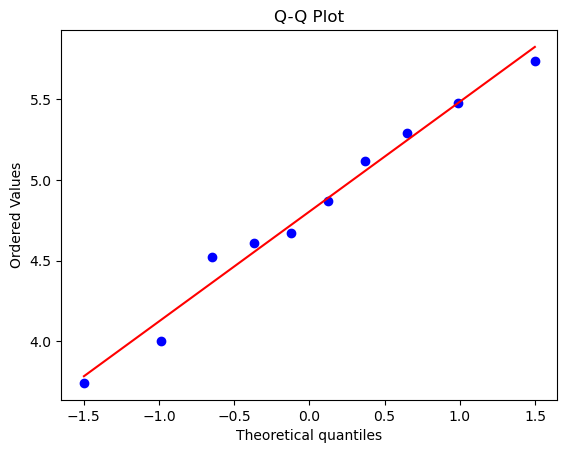

In [51]:
stats.probplot(Surface, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

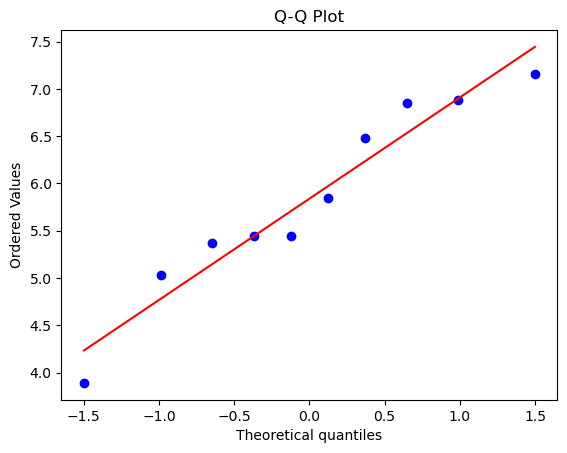

In [52]:
stats.probplot(Bottom, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

#### (b) Apply an appropriate procedure to determine if the data support the claim in part a.

In [ ]:
#Parameter of Interest: The difference in the means between HCB concentrations of the surface and bottom of the Wolf River in Tenesee
#Null: The means are equal, there is no difference, u1 - u2 = 0
#Alt Hypothesis: u1 does not equal u2
#test stat: t-statistic detailed on pg. 365 

In [58]:
t_statistic, p_value = stats.ttest_ind(Surface, Bottom, equal_var = False)

s1_squared = np.var(Surface, ddof=1)
s2_squared = np.var(Bottom, ddof=1)

n1 = len(Surface)
n2 = len(Bottom)

numerator = (s1_squared / n1 + s2_squared / n2) ** 2
denominator = ((s1_squared / n1) ** 2 / (n1 - 1)) + ((s2_squared / n2) ** 2 / (n2 - 1))

# Calculate degrees of freedom
dof = numerator / denominator

print('Degrees of freedom =', dof)
print('t_statistic =', t_statistic)
print('P value is', p_value)
print('Critical values are +- 2.131')


Degrees of freedom = 15.067629250244075
t_statistic = -2.7400167591564593
P value is 0.015140406357785761
Critical values are +- 2.131


#### Because -2.75 < -2.131, we reject the null. There is a significant difference between the means

#### (C) 

In [ ]:
delta = 2.0  # True difference in means
sd1 = Surface.std()    # Standard deviation of group 1
sd2 = Bottom.std()  # Standard deviation of group 2
alpha = 0.05 # Significance level
n1      # Sample size for group 1
n2       # Sample size for group 2

# Calculate effect size (Cohen's d)
effect_size = delta / ((sd1**2 + sd2**2) / 2)**0.5

# Calculate power
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=n1, alpha=alpha, ratio=n2/n1, alternative='two-sided')

print(f"Power of the test: {power:.4f}")


Power of the test: 0.9995


### (D) What Sampe size would be required to detect a difference of 1.0 ng/L at alpha = 0.05 if the power must be at least 0.9?

In [68]:
power = 0.9
delta = 1
effect_size = delta / ((sd1**2 + sd2**2) / 2)**0.5

sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(f"Required sample size per group: {sample_size:.4f}")

Required sample size per group: 14.5244
